# 0. Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv("../data/train.csv")
df
df = df.drop(columns = ["Id"])

# 1.Preproccessing
## 1.1. Missing value

In [3]:
temp = df.isna().sum(axis = 0) 
temp[temp > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Có 19 cột có dữ liệu khuyết, chia thành 3 nhóm:
- Các cột ít hơn 100 điểm khuyết
- 2 cột với 259 và 690 điểm khuyết, nhóm sẽ khảo sát các cột này
- Trên 1000 điểm khuyết, nhóm loại bỏ các cột ra khỏi dữ liệu

Cột LotFrontage, theo mô tả là độ dài phần đường tiếp xúc với ngôi nhà, hay độ dài mặt tiền. Đôi khi có những căn nhà không có đường chính nối tới, do đó có thể xuất hiện dữ liệu nan. Nhóm sẽ điền giá trị `0` và các giá trị này

Cột FireplaceQu, theo mô tả là chất lượng cơ sở vật chất chống cháy của tòa nhà, có 6 giá trị, trong đó giá trị nan mô tả nhà không có các thiết bị chống cháy. Nhóm sẽ thay thế các giá trị này bằng chuỗi `Na`

In [4]:
df["MasVnrType"] = df["MasVnrType"].fillna("None")
df["MasVnrArea"] = df["MasVnrArea"].fillna(df["MasVnrArea"].mean())
df["BsmtQual"] = df["BsmtQual"].fillna("NA")
df["BsmtCond"] = df["BsmtCond"].fillna("NA")
df["BsmtExposure"] = df["BsmtExposure"].fillna("NA")
df["BsmtFinType1"] = df["BsmtFinType1"].fillna("NA")
df["BsmtFinType2"] = df["BsmtFinType2"].fillna("NA")
df["GarageType"] = df["GarageType"].fillna("NA")
df["GarageYrBlt"] = df["GarageYrBlt"].fillna(0)
df["GarageFinish"] = df["GarageFinish"].fillna("NA")
df["GarageQual"] = df["GarageQual"].fillna("NA")
df["GarageCond"] = df["GarageCond"].fillna("NA")
df["Electrical"] = df["Electrical"].fillna("SBrkr")


In [5]:
#xóa các cột nhiều giá trị null
df = df.drop(columns = ['Alley', 'PoolQC', 'Fence', 'MiscFeature'])

In [6]:
#Điền giá trị null

df['LotFrontage'] = df['LotFrontage'].fillna(0)
df['FireplaceQu'] = df['FireplaceQu'].fillna('Na')

In [7]:
df = df.reset_index(drop = True)

## 1.2. Duplicated values

In [8]:
df.duplicated().sum()

0

## 1.3. Outliers

### 1.3.1 Categorical outliers

In [9]:
dftypes = df.dtypes
categorical_col = list(dftypes[dftypes == "object"].keys())
categorical_col.append("MSSubClass")
categorical_col.append("KitchenAbvGr")

numerical_col = list(df.columns[~df.columns.isin(categorical_col)])[:-1]

In [10]:
# df = df.drop(columns = [
#     "Street", "LandContour", "Utilities", "LandSlope",
#     "Condition1", "Condition2", "BldgType", "RoofMatl",
#     "BsmtCond", "BsmtFinType2", "Heating", "CentralAir",
#     "Electrical", "Functional", "GarageQual", "GarageCond",
#     "PavedDrive"
# ])

In [11]:
# for col in numerical_col:
#     q1, q3 = df[col].quantile([0.25, 0.75])
#     iqr = q3 - q1
#     df = df[(df[col] > (q1 - 2 * iqr)) & (df[col] < (q3 + 2 * iqr))]

# df.shape

### Nomalization

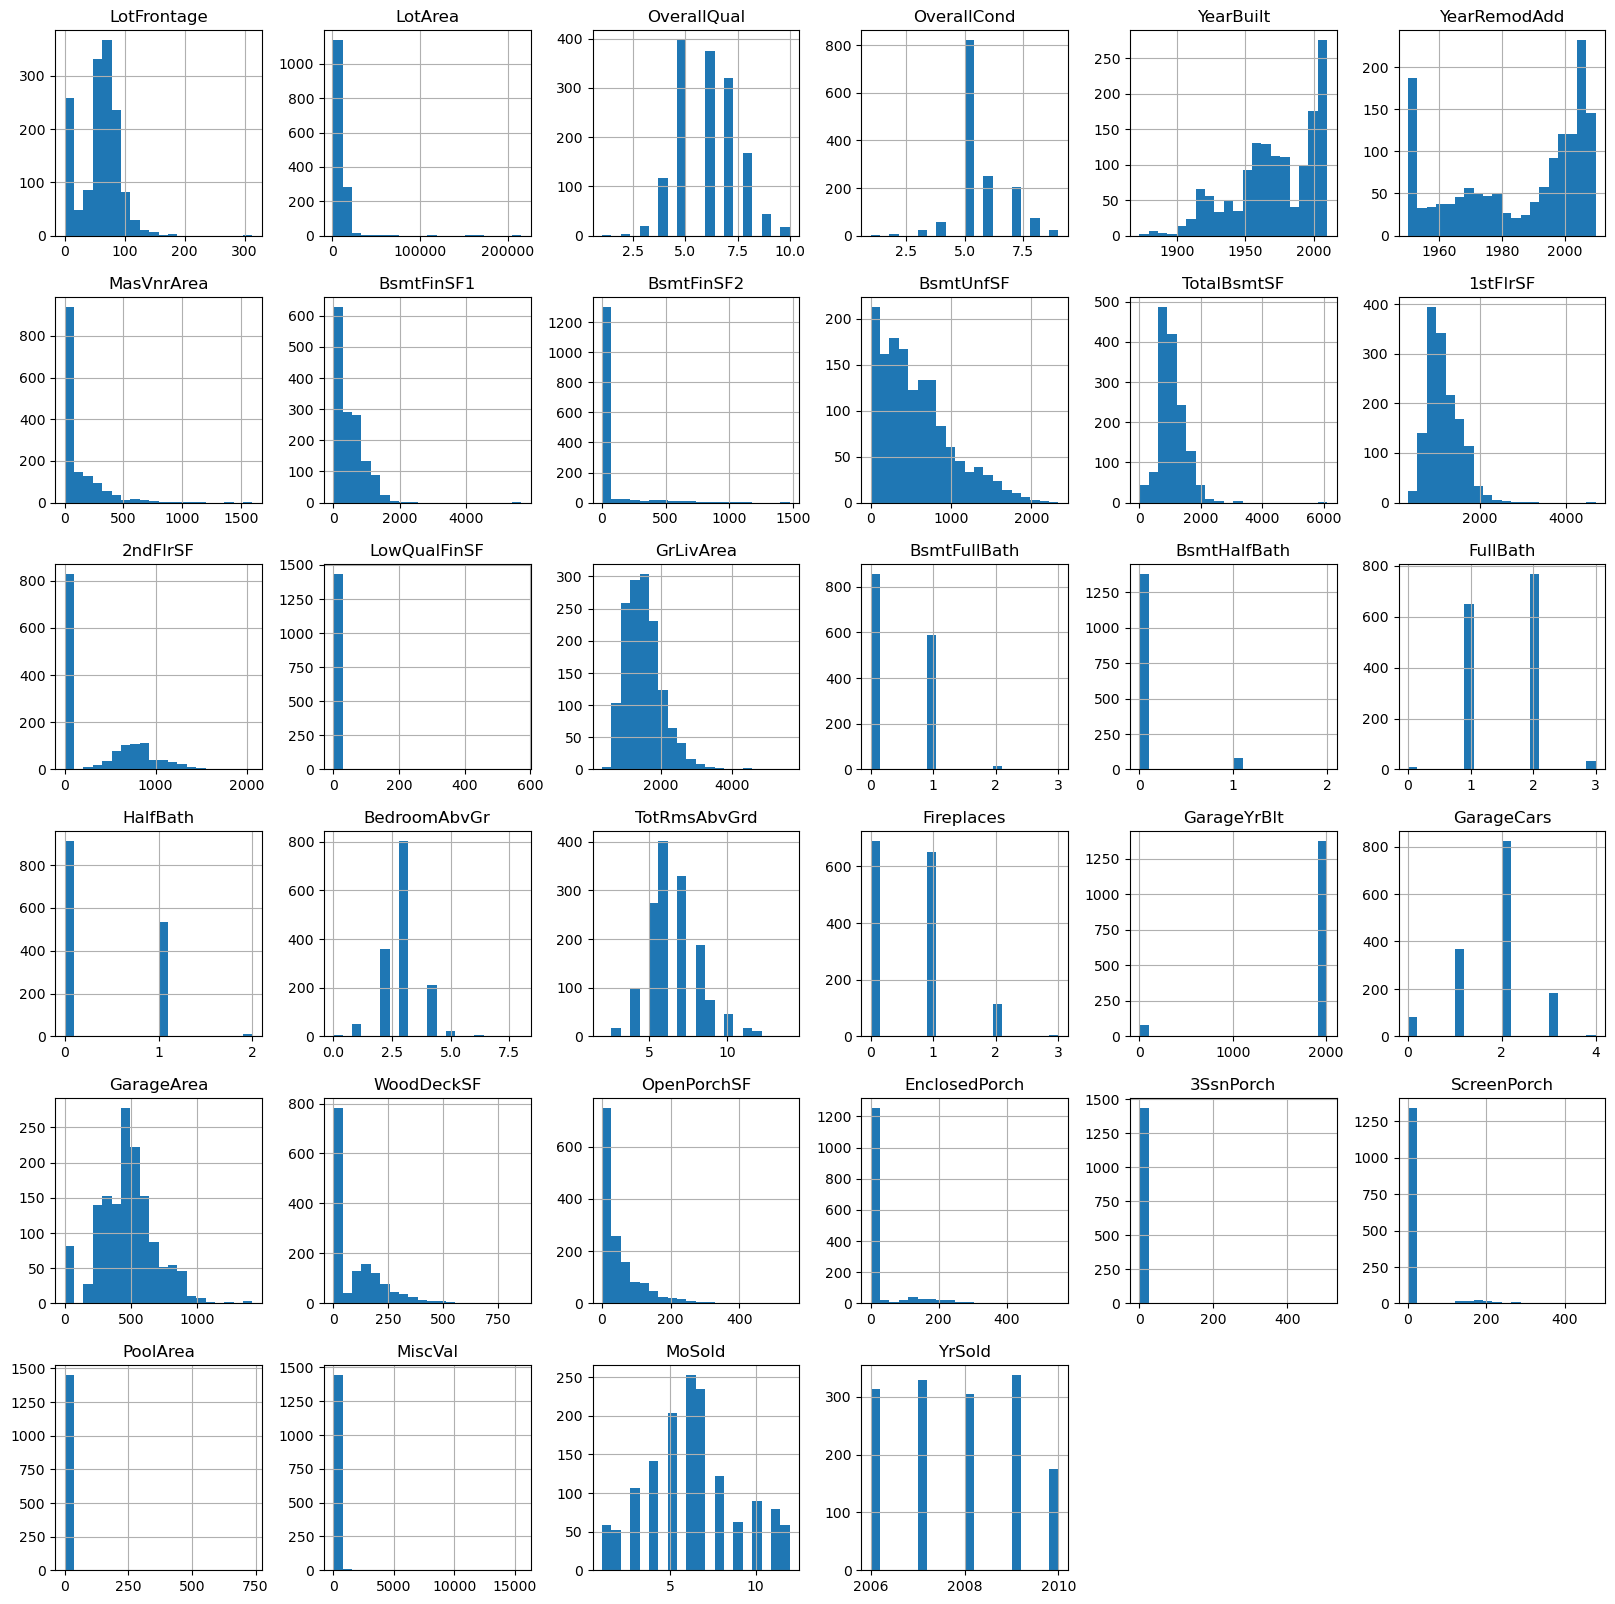

In [12]:
df[numerical_col].hist(bins = 20, figsize = (20, 20));

In [13]:
df["LotFrontage"] = stats.boxcox(df["LotFrontage"] + 1)[0]
df["YearBuilt"] = stats.boxcox(df["YearBuilt"] - df["YearBuilt"].min() + 1)[0]
df["BsmtUnfSF"] = stats.boxcox(df["BsmtUnfSF"] + 1)[0]
df["YearRemodAdd"] = stats.boxcox(df["YearRemodAdd"] + 1)[0]
df["BsmtFinSF1"] = stats.boxcox(df["BsmtFinSF1"] + 1)[0]
df["TotalBsmtSF"] = stats.boxcox(df["TotalBsmtSF"] + 1)[0]
df["1stFlrSF"] = stats.boxcox(df["1stFlrSF"] + 1)[0]
df["GrLivArea"] = stats.boxcox(df["GrLivArea"] + 1)[0]
df["GarageArea"] = stats.boxcox(df["GarageArea"] + 1)[0]   
df["OpenPorchSF"] = stats.boxcox(df["OpenPorchSF"] + 1)[0]

/home/xaxiu/miniconda3/lib/python3.10/site-packages/numpy/core/_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/xaxiu/miniconda3/lib/python3.10/site-packages/scipy/optimize/_optimize.py:2417: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


In [14]:
df.to_csv("../data/preprocessed.csv", index = False)